# Taréa 1 de Evaluación:
# Fecha límite de presentación: martes 9 de julio hasta las 23:59

### Apellidos : Gaviño Alonso
### Nombres: Carmen

## 1. Ejercicio de Regresión

El director de la empresa HATCO (hatco.sav), está muy interesado en determinar si el grado de relación de los clientes con su empresa (X9 es el porcentaje de compras a HATCO de cada cliente sobre el total de las compras que realizan) tiene que ver con la percepción que estos tienen de HATCO, medida con las siguientes variables:

* X1 Rapidez de servicio
* X2 Nivel de precios
* X3 Flexibilidad de precios
* X4 Imagen del fabricante
* X5 Calidad del servicio
* X6 Imagen de los vendedores
* X7 Calidad del producto



In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

!pip install pyreadstat
import pyreadstat

import warnings
warnings.filterwarnings('ignore')

In [28]:
path = '/content/drive/MyDrive/Colab Notebooks/hatco.sav'
hatco = pd.read_spss(path)
hatco.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,1.0,4.1,0.6,6.9,4.7,2.4,2.3,5.2,Pequeña,32.0
1,2.0,1.8,3.0,6.3,6.6,2.5,4.0,8.4,Grande,43.0
2,3.0,3.4,5.2,5.7,6.0,4.3,2.7,8.2,Grande,48.0
3,4.0,2.7,1.0,7.1,5.9,1.8,2.3,7.8,Grande,32.0
4,5.0,6.0,0.9,9.6,7.8,3.4,4.6,4.5,Pequeña,58.0


### 1.1. Ajusta un modelo de regresión lineal múltiple con los coeficientes significativos. Utiliza un 80% de los datos para entrenamiento y un 20% para el test.

In [108]:
# División de los datos en train y test
# ==============================================================================
X = hatco[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7',]]
y = hatco['x9']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [109]:
hatco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      100 non-null    float64 
 1   x1      100 non-null    float64 
 2   x2      100 non-null    float64 
 3   x3      100 non-null    float64 
 4   x4      100 non-null    float64 
 5   x5      100 non-null    float64 
 6   x6      100 non-null    float64 
 7   x7      100 non-null    float64 
 8   x8      100 non-null    category
 9   x9      100 non-null    float64 
dtypes: category(1), float64(9)
memory usage: 7.4 KB


In [110]:
X_train

,x1,x2,x3,x4,x5,x6,x7
9,4.0,3.5,6.5,6.0,3.7,3.2,8.7
51,2.6,4.8,8.2,5.0,3.6,2.5,9.0
29,4.1,3.7,5.9,5.5,3.9,3.0,8.4
88,2.9,1.2,7.3,6.1,2.0,2.5,8.0
75,4.2,2.4,9.4,4.9,3.2,2.7,8.5
...,...,...,...,...,...,...,...
76,3.8,0.8,8.3,6.1,2.2,2.6,5.3
53,2.8,2.4,6.7,4.9,2.5,2.6,9.2
38,0.0,2.1,6.9,5.4,1.1,2.6,8.9
83,2.3,3.7,7.6,5.0,3.0,2.5,7.4


In [111]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 9 to 47
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      80 non-null     float64
 1   x2      80 non-null     float64
 2   x3      80 non-null     float64
 3   x4      80 non-null     float64
 4   x5      80 non-null     float64
 5   x6      80 non-null     float64
 6   x7      80 non-null     float64
dtypes: float64(7)
memory usage: 5.0 KB


In [112]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 40 to 82
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      20 non-null     float64
 1   x2      20 non-null     float64
 2   x3      20 non-null     float64
 3   x4      20 non-null     float64
 4   x5      20 non-null     float64
 5   x6      20 non-null     float64
 6   x7      20 non-null     float64
dtypes: float64(7)
memory usage: 1.2 KB


In [113]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     31.64
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           1.43e-19
Time:                        11:18:19   Log-Likelihood:                -230.68
No. Observations:                  80   AIC:                             477.4
Df Residuals:                      72   BIC:                             496.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.8765      5.781     -1.363      0.1

In [114]:
# Creación del modelo utilizando matrices
# ==============================================================================
# Se elimina la columna periodico del conjunto de train y test
X_train = X_train.drop(columns = 'x2')
X_test  = X_test.drop(columns = 'x2')


In [115]:
# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     37.43
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           2.22e-20
Time:                        11:18:23   Log-Likelihood:                -230.69
No. Observations:                  80   AIC:                             475.4
Df Residuals:                      73   BIC:                             492.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.7849      5.546     -1.404      0.1

In [116]:
X_train = X_train.drop(columns = 'x4')
X_test  = X_test.drop(columns = 'x4')


X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     45.52
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           3.13e-21
Time:                        11:18:27   Log-Likelihood:                -230.69
No. Observations:                  80   AIC:                             473.4
Df Residuals:                      74   BIC:                             487.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9283      5.297     -1.497      0.1

In [117]:

X_train = X_train.drop(columns = 'x1')
X_test  = X_test.drop(columns = 'x1')


X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     57.43
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           4.31e-22
Time:                        11:18:30   Log-Likelihood:                -230.82
No. Observations:                  80   AIC:                             471.6
Df Residuals:                      75   BIC:                             483.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9144      5.270     -1.502      0.1

In [118]:

X_train = X_train.drop(columns = 'x7')
X_test  = X_test.drop(columns = 'x7')


X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     75.98
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           8.14e-23
Time:                        11:18:32   Log-Likelihood:                -231.45
No. Observations:                  80   AIC:                             470.9
Df Residuals:                      76   BIC:                             480.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7093      3.610     -1.028      0.3

In [119]:

X_train = X_train.drop(columns = 'x6')
X_test  = X_test.drop(columns = 'x6')

X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     109.3
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           3.25e-23
Time:                        11:18:35   Log-Likelihood:                -233.10
No. Observations:                  80   AIC:                             472.2
Df Residuals:                      77   BIC:                             479.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5943      3.458     -0.461      0.6

In [120]:
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-8.480333,5.291685
x3,2.485219,3.945455
x5,6.310308,8.979026


In [121]:
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

<ipython-input-122-41be233f6c4a>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


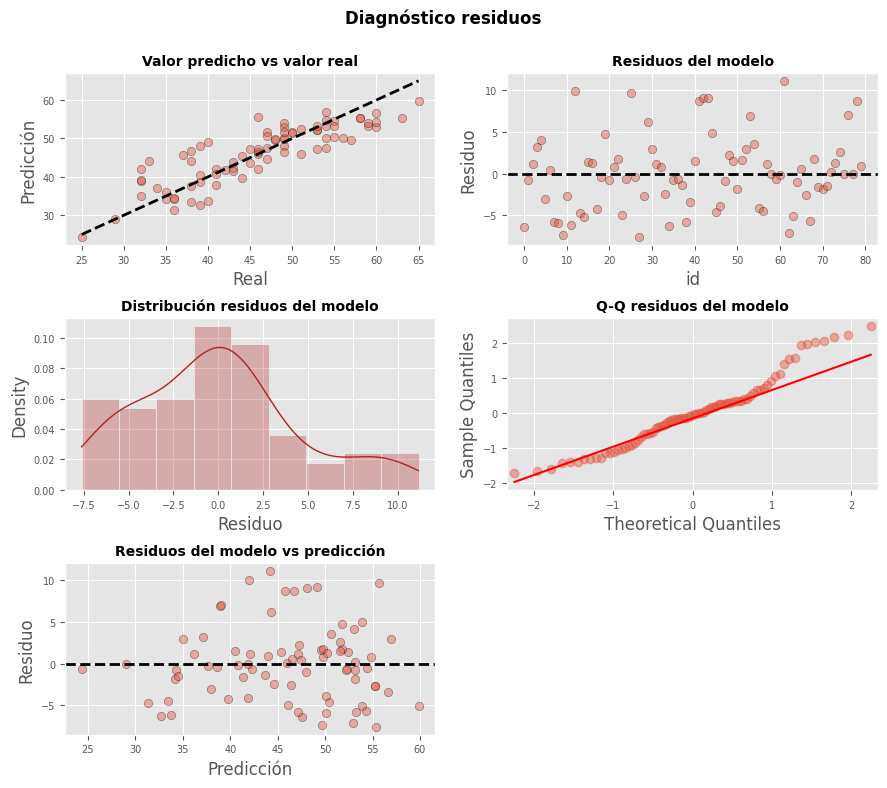

In [122]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");


In [123]:
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.9576278328895569, pvalue=0.0096615981310606)

Con este test se rechaza la hipotesis de que los datos se distribuyen de forma normal (p-value<0,05)

In [124]:
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 4.0013418689530855, p-value = 0.13524451258318204


Con este test no se rechaza la hipotesis de que los datos se distribuyen de forma normal (p-value<0,05) al ser p-value > 0,05

In [125]:
vif = pd.DataFrame()
vif["variables"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

,variables,VIF
0,const,46.328578
1,x3,1.002945
2,x5,1.002945


In [126]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
9,47.590638,0.954636,45.689714,49.491561,38.344384,56.836891
51,52.292244,0.708412,50.881616,53.702873,43.134212,61.450277
29,47.190369,1.181465,44.837771,49.542967,37.840801,56.539936
88,37.166973,0.803450,35.567100,38.766846,27.977888,46.356058


In [127]:
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse= mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 4.369525494366161


#Interpretación
El modelo de regresión lineal múltiple:
$$𝑣𝑒𝑛𝑡𝑎𝑠=-1.594+3.215x_3+7.645x_5$$
es capaz de explicar el 73.9% de la varianza observada en las ventas (R-squared: 0.739, Adj. R-squared: 0.733). El test  𝐹  es significativo ( 𝑝−𝑣𝑎𝑙𝑢𝑒:  3.25e-23). Por lo que hay evidencias claras de que el modelo es capaz de explicar la varianza en las ventas mejor de lo esperado por azar. Los test estadísticos para cada variable confirman que tv y radio están relacionadas con la cantidad de ventas y contribuyen al modelo.
Sin embargo, no satisfacen las condiciones de normalidad, por lo que los intervalos de confianza estimados para los coeficientes y las predicciones no son fiables.
El error (rmse) de test es de 4.369. Las predicciones del modelo final se alejan en promedio 4.369 unidades del valor real

### 1.3. Ajusta un modelo usando los arboles de decisiones para regresiones.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('once')

In [77]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        hatco.drop(columns = {"x9", "x8"}),
                                        hatco['x9'],
                                        random_state = 123
                                    )
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


DecisionTreeRegressor(max_depth=3, random_state=123)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:241: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float(alpha)


Profundidad del árbol: 3
Número de nodos terminales: 8


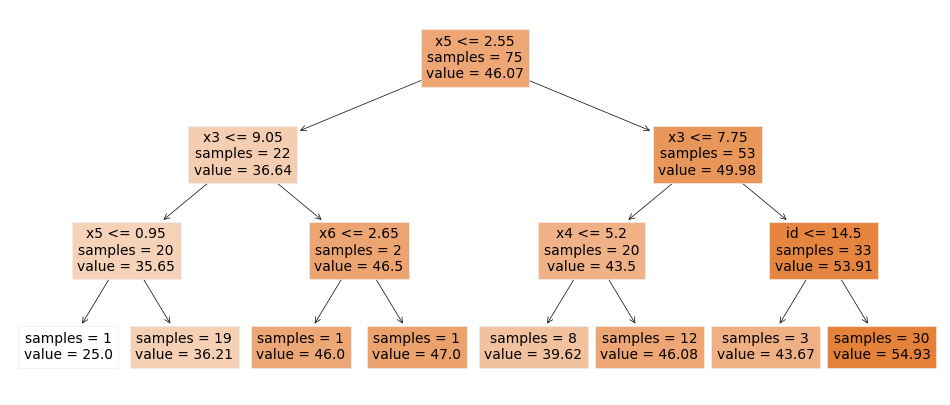

In [78]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = hatco.drop(columns = "x9").columns,
            class_names   = 'x9',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [84]:
importancia_predictores = pd.DataFrame(
                            {'predictor': hatco.drop(columns = {"x8", "x9"}).columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
5,x5,0.577807
3,x3,0.312773
0,id,0.069264
4,x4,0.040056
6,x6,0.000100
1,x1,0.000000
2,x2,0.000000
7,x7,0.000000


In [85]:
# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'ccp_alpha': array([ 0.        ,  4.21052632,  8.42105263, 12.63157895, 16.84210526,
       21.05263158, 25.26315789, 29.47368421, 33.68421053, 37.89473684,
       42.10526316, 46.31578947, 50.52631579, 54.73684211, 58.94736842,
       63.15789474, 67.36842105, 71.57894737, 75.78947368, 80.        ])},
             return_train_score=True)

In [86]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 4.2105263157894735}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:241: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float(alpha)


Profundidad del árbol: 3
Número de nodos terminales: 4


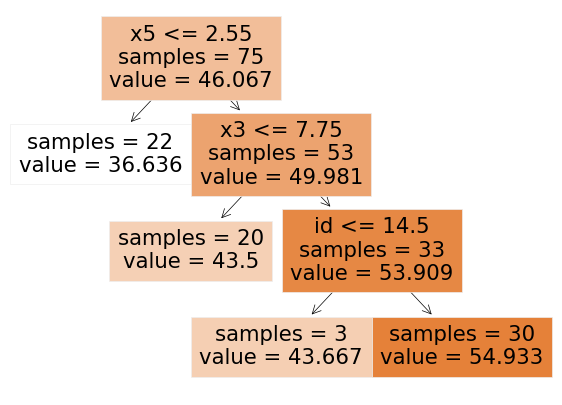

In [87]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = hatco.drop(columns = "x9").columns,
            class_names   = 'x9',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

In [101]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test)

rmse_inicial = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse_inicial}")

El error (rmse) de test es: 7.214069561513131


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
# Error de test del modelo final (tras aplicar pruning)
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test)

rmse_final = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse_final}")

El error (rmse) de test es: 7.682256541195321


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Las predicciones del modelo inicial se alejan en promedio 7.21 unidades del valor real, mientras que las del modelo final un 7.68. Por ello, el proceso del pruning no ha reducido el rmse, el primer modelo es mejor para predecir.

### 1.3. Compara los RSME de los dos modelos usando un gráfico de barras.

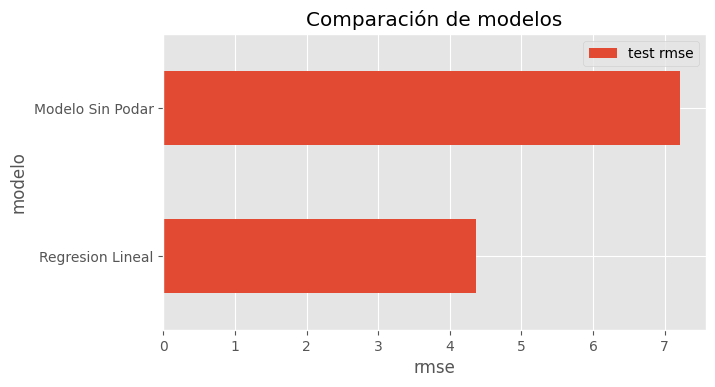

In [128]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Regresion Lineal', 'Modelo Sin Podar'],
                    'test rmse': [rmse, rmse_inicial]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

# 2. Ejercicio de Clasificación

Se cuenta con un data set de los pasajeros del Titanic (Titanic.sav). A partir de este conjunto de datos se quiere predecir si los pasajeros sobrevivieron o no (Survived: Yes or No).

* Survived:	Survival	No, Yes
* Pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* Sex: male, female
* Age:	Age in years
* Sibsp:	# of siblings / spouses aboard the Titanic
* Parch:	# of parents / children aboard the Titanic
* Fare:	Passenger fare
* Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### 2.1. Teniendo en cuenta las variables independientes creadas y no creadas:

* Es_mujer: A partir de sexo recodificar female como 1 y el resto como 0
* P1class: A partir de Pclass recodificar '1st class' como 1 y el resto como 0.
* P2class: A partir de Pclass recodificar '2nd class' como 1 y el resto como 0.
* Sibsp
* Parch
* Fare

Ajusta un modelo de regresión logística con las variables significativas.


In [7]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Lectura de un fichero de formato .sav (SPSS)
# ==============================================================================
!pip install pyreadstat
import pyreadstat

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [165]:
path = '/content/drive/MyDrive/Colab Notebooks/Titanic.sav'
titanic = pd.read_spss(path)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,No,3rd class,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,,Southampton
1,2.0,Yes,1st class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,Cherbourg
2,3.0,Yes,3rd class,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,,Southampton
3,4.0,Yes,1st class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,Southampton
4,5.0,No,3rd class,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,,Southampton


In [166]:
titanic = titanic.dropna()

In [167]:
titanic['Survived'] = np.where(titanic['Survived'] == 'Yes', 1, 0)
titanic['Es_mujer'] = np.where(titanic['Sex'] == 'female', 1, 0)
titanic['P1class'] = np.where(titanic['Pclass'] == '1st class', 1, 0)
titanic['P2class'] = np.where(titanic['Pclass'] == '2nd class',1, 0)

print("Número de observaciones por clase")
print(titanic['Survived'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * titanic['Survived'].value_counts(normalize=True))

Número de observaciones por clase
Survived
0    424
1    290
Name: count, dtype: int64

Porcentaje de observaciones por clase
Survived
0    59.383754
1    40.616246
Name: proportion, dtype: float64


In [168]:
# División de los datos en train y test
# ==============================================================================
#X = titanic.drop(columns = 'Survived')
X = titanic[['Es_mujer', 'P1class', 'P2class', 'SibSp', 'Parch', 'Fare']]
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [169]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.473120
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  571
Model:                          Logit   Df Residuals:                      564
Method:                           MLE   Df Model:                            6
Date:                Sun, 07 Jul 2024   Pseudo R-squ.:                  0.2996
Time:                        11:27:05   Log-Likelihood:                -270.15
converged:                       True   LL-Null:                       -385.70
Covariance Type:            nonrobust   LLR p-value:                 4.457e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0206      0.204     -9.894      0.000      -2.421      -1.620
Es_mujer       2.7175      0.

In [172]:
# Predicciones con intervalo de confianza
# ==============================================================================
predicciones = modelo.predict(exog = X_train)
predicciones

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


636    0.119615
630    0.394140
795    0.249215
345    0.834065
141    0.672803
         ...   
831    0.206574
465    0.119330
253    0.104021
70     0.247769
369    0.917537
Length: 571, dtype: float64

In [173]:
# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,

In [174]:
# Accuracy de test del modelo
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 76.22377622377621%


El modelo logístico creado para predecir la supervivencia de un pasajero es en conjunto significativo (p-value = 0). El porcentaje de clasificación correcta en el conjunto del test es del 76.22%

In [175]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Predicción,0,1
Real,,
0,67,18
1,16,42


### 2.2. Ajusta un modelo de Arboles de Decisión usando como variables independientes:

* Pclass
* Sex
* Age
* SibSp
* Parch
* Fare
* Embarked

Nota: Para las variables categóricas usar OneHotEncoding

In [97]:
path = '/content/drive/MyDrive/Colab Notebooks/Titanic.sav'
titanic = pd.read_spss(path)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,No,3rd class,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,,Southampton
1,2.0,Yes,1st class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,Cherbourg
2,3.0,Yes,3rd class,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,,Southampton
3,4.0,Yes,1st class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,Southampton
4,5.0,No,3rd class,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,,Southampton


In [98]:
titanic['Survived'] = np.where(titanic['Survived'] == 'Yes', 1, 0)
# Una vez creada la nueva variable respuesta se descarta la original


print("Número de observaciones por clase")
print(titanic['Survived'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * titanic['Survived'].value_counts(normalize=True))

Número de observaciones por clase
Survived
0    967
1    342
Name: count, dtype: int64

Porcentaje de observaciones por clase
Survived
0    73.873186
1    26.126814
Name: proportion, dtype: float64


In [104]:
titanic = titanic.dropna()

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
                                        #titanic.drop(columns = 'Survived'),
                                        titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']],
                                        titanic['Survived'],
                                        random_state = 123
                                    )

In [106]:
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()


preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [107]:
# Convertir el output del ColumnTransformer en dataframe y añadir el nombre de las columnas
# ------------------------------------------------------------------------------
# Nombre de todas las columnas
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out()
labels = np.concatenate([encoded_cat,numeric_cols])

# Conversión a dataframe
X_train_prep = pd.DataFrame(X_train_prep, columns=labels)
X_test_prep  = pd.DataFrame(X_test_prep, columns=labels)
X_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pclass_1st class      783 non-null    float64
 1   Pclass_2nd class      783 non-null    float64
 2   Pclass_3rd class      783 non-null    float64
 3   Sex_female            783 non-null    float64
 4   Sex_male              783 non-null    float64
 5   Embarked_             783 non-null    float64
 6   Embarked_Cherbourg    783 non-null    float64
 7   Embarked_Queenstown   783 non-null    float64
 8   Embarked_Southampton  783 non-null    float64
 9   Age                   783 non-null    float64
 10  SibSp                 783 non-null    float64
 11  Parch                 783 non-null    float64
 12  Fare                  783 non-null    float64
dtypes: float64(13)
memory usage: 79.6 KB


In [108]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train_prep, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

Profundidad del árbol: 5
Número de nodos terminales: 24


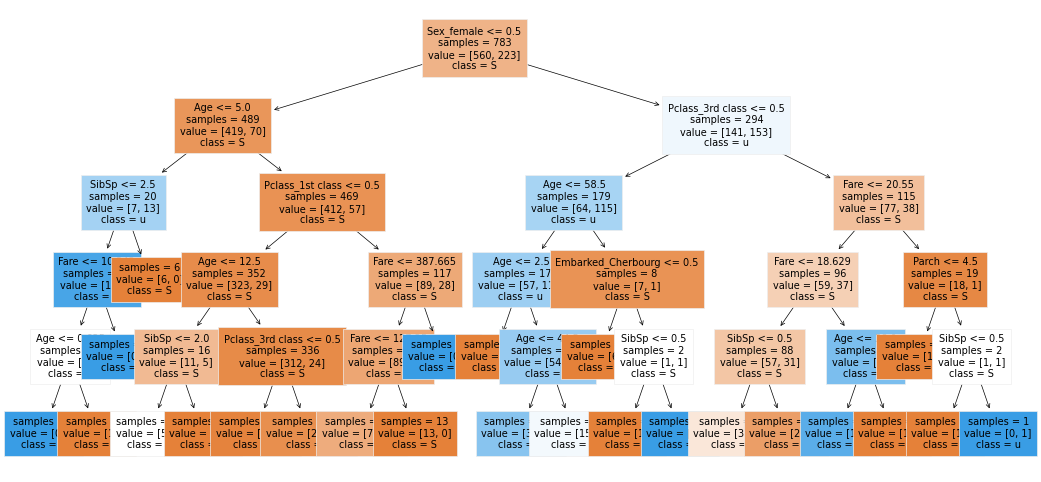

In [110]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = labels.tolist(),
            class_names   = 'Survived',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

In [111]:
# Error de test del modelo
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test_prep,)

print("Matriz de confusión")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)

Matriz de confusión
-------------------


array([[169,  26],
       [ 34,  33]])

In [112]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 77.09923664122137 %


El modelo inicial es capaz de predecir correctamente un 77 % de las observaciones del conjunto de test.

In [113]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 5, 10)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train_prep, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'ccp_alpha': array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])},
             return_train_score=True, scoring='accuracy')

In [114]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 0.0}

In [115]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Profundidad del árbol: 21
Número de nodos terminales: 202


In [118]:
# Error de test del modelo final
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test_prep)

print("Matriz de confusión")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)

Matriz de confusión
-------------------


array([[157,  38],
       [ 37,  30]])

In [119]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 71.37404580152672 %


In [120]:
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores = pd.DataFrame(
                            {'predictor': labels.tolist(),
                             'importancia': modelo_final.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
9,Age,0.329338
12,Fare,0.279923
3,Sex_female,0.171557
10,SibSp,0.063368
2,Pclass_3rd class,0.046722
11,Parch,0.045234
8,Embarked_Southampton,0.029303
0,Pclass_1st class,0.014197
6,Embarked_Cherbourg,0.011335
1,Pclass_2nd class,0.007968


Debido al proceso de pruning el porcentaje de acierto ha pasando de 77% a 71,37%, por ello el pruning es peor.

### 2.3 Repetir el mismo procedimiento usando un Random Forest con las variables independientes de la sección anterior (2.2)

In [121]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 8

# Preprocesado y modelado
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from joblib import Parallel, delayed, cpu_count
#import optuna

!pip install pyreadstat
import pyreadstat
# Configuración warnings
# ==============================================================================
import warnings

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [146]:
path = '/content/drive/MyDrive/Colab Notebooks/Titanic.sav'
titanic = pd.read_spss(path)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,No,3rd class,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,,Southampton
1,2.0,Yes,1st class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,Cherbourg
2,3.0,Yes,3rd class,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,,Southampton
3,4.0,Yes,1st class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,Southampton
4,5.0,No,3rd class,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,,Southampton


In [147]:
titanic['Survived'] = np.where(titanic['Survived'] == 'Yes', 1, 0)
# Una vez creada la nueva variable respuesta se descarta la original


print("Número de observaciones por clase")
print(titanic['Survived'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * titanic['Survived'].value_counts(normalize=True))

Número de observaciones por clase
Survived
0    967
1    342
Name: count, dtype: int64

Porcentaje de observaciones por clase
Survived
0    73.873186
1    26.126814
Name: proportion, dtype: float64


In [148]:
titanic = titanic.dropna()

In [149]:
# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                       # titanic.drop(columns = 'Survived'),
                                        titanic[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked']],
                                        titanic['Survived'],
                                        random_state = 123
                                    )

# One-hot-encoding de las variables categóricas
# ==============================================================================
# Se identifica el nobre de las columnas numéricas y categóricas
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# Se aplica one-hot-encoding solo a las columnas categóricas
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary'), cat_cols)],
                    remainder='passthrough',
                    verbose_feature_names_out=False
               ).set_output(transform="pandas")

# Una vez que se ha definido el objeto ColumnTransformer, con el método fit()
# se aprenden las transformaciones con los datos de entrenamiento y se aplican a
# los dos conjuntos con transform(). Ambas operaciones a la vez con fit_transform().
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [150]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {
    'n_estimators': [150],
    'max_features': [5, 7, 9],
    'max_depth'   : [None, 3, 10, 20],
    'criterion'   : ['gini', 'entropy']
}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123),
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X=X_train_prep, y=y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex='(param*|mean_t|std_t)') \
    .drop(columns='params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
5,gini,3,9,150,0.791355,0.034689,0.805127,0.006302
17,entropy,3,9,150,0.790503,0.034818,0.803637,0.006797
16,entropy,3,7,150,0.786249,0.034933,0.801083,0.007987
4,gini,3,7,150,0.785821,0.036015,0.803423,0.007373


In [151]:
# Mejores hiperparámetros encontrados por validación cruzada
# ==============================================================================
print("--------------------------------------------")
print("Mejores hiperparámetros encontrados por (cv)")
print("--------------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

--------------------------------------------
Mejores hiperparámetros encontrados por (cv)
--------------------------------------------
{'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} : 0.7913550002721977 accuracy


In [152]:
# Modelo con los mejores hiperparámetros
# ==============================================================================
modelo_final = grid.best_estimator_
modelo_final

RandomForestClassifier(max_depth=3, max_features=9, n_estimators=150,
                       random_state=123)

In [153]:
# Error de test del modelo final
# ==============================================================================
predicciones = modelo_final.predict(X=X_test_prep)
predicciones[:10]

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

Matriz de confusión
-------------------
[[171  24]
 [ 33  34]]

El accuracy de test es: 78.2442748091603 % 

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       195
           1       0.59      0.51      0.54        67

    accuracy                           0.78       262
   macro avg       0.71      0.69      0.70       262
weighted avg       0.77      0.78      0.78       262



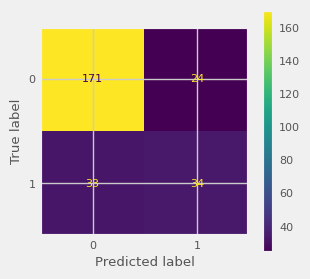

In [154]:
mat_confusion = confusion_matrix(y_true=y_test, y_pred=predicciones)
accuracy = accuracy_score(y_true=y_test, y_pred=predicciones, normalize=True)
print("Matriz de confusión")
print("-------------------")
print(mat_confusion)
print("")
print(f"El accuracy de test es: {100 * accuracy} % \n")
fig, ax = plt.subplots(figsize=(3, 3))
ConfusionMatrixDisplay(mat_confusion).plot(ax=ax)

print(
    classification_report(
        y_true = y_test,
        y_pred = predicciones
    )
)

Tras optimizar los hiperparámetros, se consigue un porcentaje de acierto del 78,24%.